# Condutância da pele vs Tipo de Filmes

Nos tutoriais anteriores fizemos uma pequena revisão do que havia sido definido há uns meses (questão, hipótese, metodologia) e que adaptámos ao contexto actual.

Neste tutorial vamos explorar e analisar o conjunto de dados (etapa 7) e testar a hipótese. 


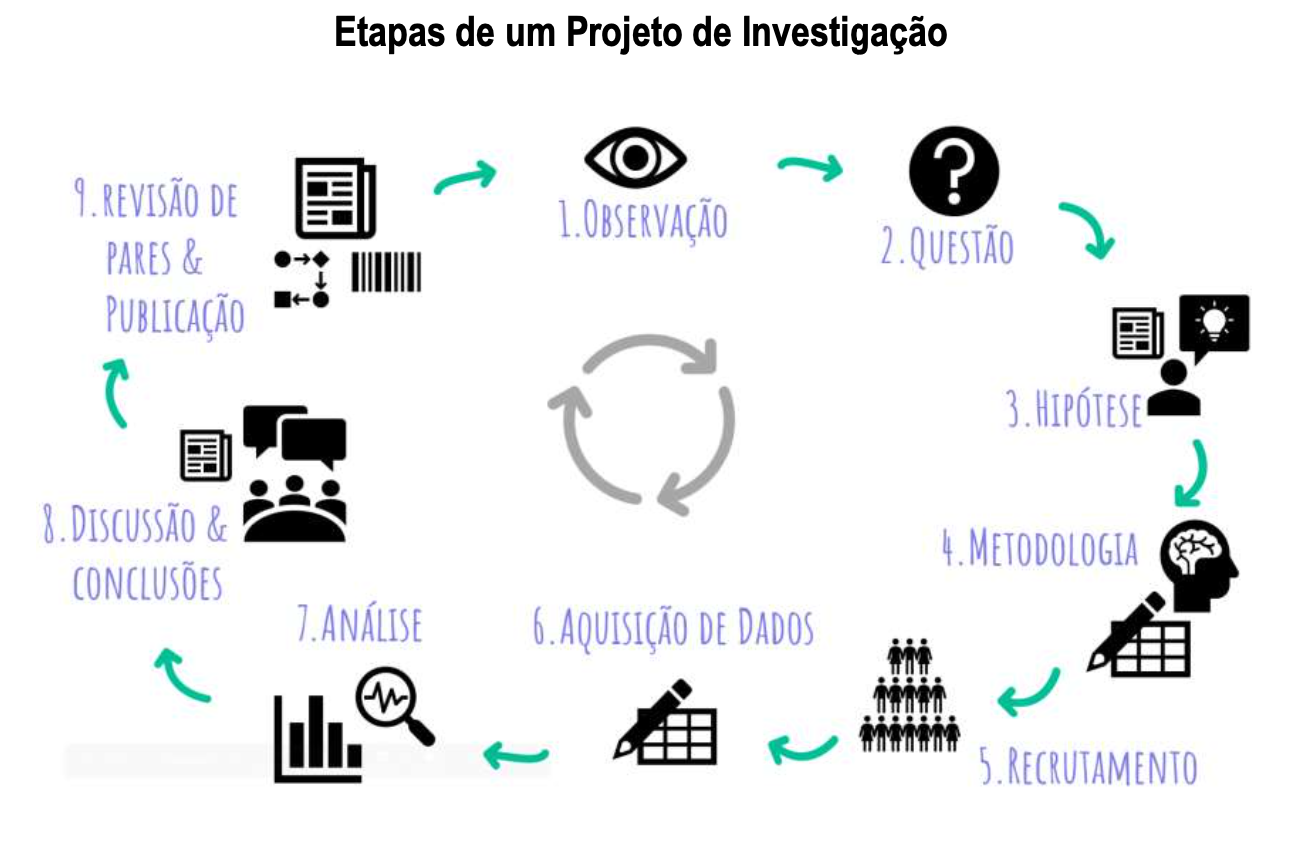


## Etapa 2: Questão
> Qual será o nível de condutância da pele numa situação tensa e numa situação relaxada?


## Etapa 3: Hipótese

> $H_1$: O nível de condutância da pele é alterado pelo tipo de vídeo que estamos a ver (há diferenças no nível de condutância da pele - SCL - quando vemos vídeos "tensos" e vídeos "relaxados") 


> $H_0$: O nível de condutância da pele não é alterada pelo tipo de vídeo que estamos a ver (não há diferenças no SCL quando vemos vídeos "tensos" e vídeos "relaxados")


## Etapa 4, 5, 6: Metodologia, Recrutamento, Aquisição de dados

Para a analisar a hipótese irá utilizar-se um conjunto de dados que está disponível na internet (online):

> [A dataset of continuous affect annotations and physiological signals for emotion analysis](https://www.nature.com/articles/s41597-019-0209-0)


In [1]:
#@title
# Data Loading
import gspread
import numpy as np
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from google.colab import files
from google.colab import drive
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import auth
auth.authenticate_user()  # verify your account to read files which you have access to. Make sure you have permission to read the file!
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default()) 
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1sRNZHKRJdf_M7wRV6tQ7wKoX65g9rYtAsa2lxXQFM78/edit?usp=sharing') # use this when you have the complete url (the edit#gid means permission)
sheet =  spreadsheet.get_worksheet(0)
df = pd.DataFrame(sheet.get_all_records())
df['video'] = df['video'].replace(1, "Divertido")
df['video'] = df['video'].replace(3, "Aborrecido")
df['video'] = df['video'].replace(7, "Assustador")

spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1txjs1FZdjR7FEGTZhiIMgmzbVMnnU_Aboud_Qw3JOlQ/edit?usp=sharing') # use this when you have the complete url (the edit#gid means permission)
sheet =  spreadsheet.get_worksheet(0)
df_subjects = pd.DataFrame(sheet.get_all_records())

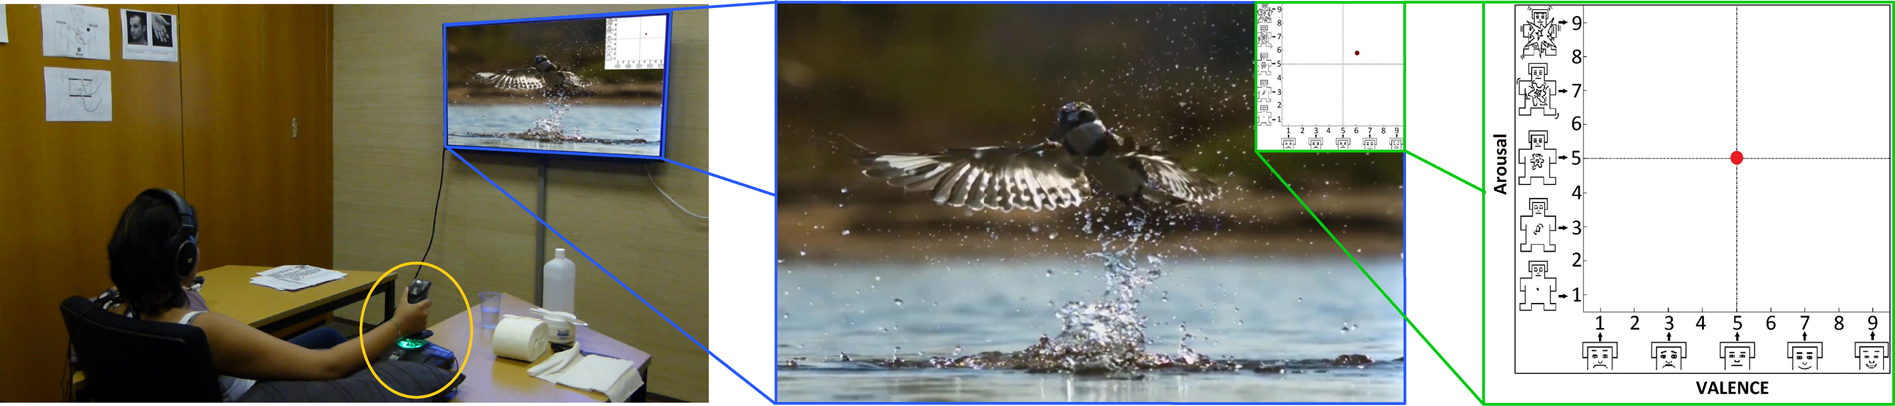

## Etapa 7: Análise

Vamos então explorar os dados recolhidos pelos investigadores.

Como vimos anteriormente, o estudo recrutou 30 participantes. Cada participante assitiu a oito pequenos excertos de differentes filmes.


### Filmes

#### Divertido:
*   When Harry Met Sally (1989)
*   **Hangover (2009)**

#### Aborrecido:
*   Matcha: The way of Tea (2012)
*   **Europe Travel Skills (2013)**

#### Relaxado:
*   Relaxing Music with Beach (2011)
*   Natural World: Zambezi (2012)

#### Assustador:
*   **Shutter (2004)**
*   Mama (2008)


Para facilitar a análise, selecionamos apenas 3 categorias (Divertido, Aborrecido e Assustador) e, para cada uma delas, um filme (Hangouver, Europe Travel Skills e Shutter). 

Na secção seguinte, vão explorar os dados de cada indivíduo para cada uma das categorias :D

In [10]:
#@title

import matplotlib.pyplot as plt
import seaborn as sns
id_videos = pd.unique(df["video"])
id_subjects = pd.unique(df["subject"])
colors = ["#074F71", "#DAAA00", "#CB4015"]


def plot_subject_data(participante):
    fig, axs = plt.subplots(2, 1, figsize=(16, 12))

    df_sub = df[df["subject"] == participante]
    for i, video_id in enumerate(id_videos):
      df_video = df_sub[df_sub["video"] == video_id]
      data = df_video["gsr"]
      time_axis = np.asarray(range(len(data)))*0.1/60
      axs[0].plot(time_axis, data, color=colors[i], label=video_id)
    axs[0].legend()
    axs[0].set_xlabel("Duração (min)")



    sns.histplot(df_sub, x="gsr", hue="video", ax=axs[1], palette=colors)
    #axs[1].set_ylabel("Contagem")
    axs[0].set_ylabel("Condutância da pele")
    axs[1].set_xlabel("Condutância da pele")

   
interact(plot_subject_data, participante=id_subjects);


interactive(children=(Dropdown(description='participante', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,…

#### STOP - Paragem para pensar!!
Responde às sequintes questões:
- O que conseguiram descobrir na exploração que fizeram?
- Os dados variam muito entre participantes? A resposta de condutância da pele, para o mesmo tipo de filme, é independente do participante?
- E olhando para um só participante, como varia a resposta de condutância da pele consoante o filme? A nossa pele produz maior quandidade de suor em que tipo de filme?


### Diferentes sujeitos mas o mesmo filme
Na interação anterior explorámos a resposta de condutância da pele de cada participante aos diferentes filmes. No entanto, não conseguimos observar como é que diferentes participantes respondem ao mesmo filme. 

Vamos ver agora, explora a interação!

In [11]:
#@title

def plot_video_data(video):
    df_sub = df[df["video"] == video]

    fig = plt.figure(figsize=(16, 10))

    for i, subject in enumerate(id_subjects):
      df_video = df_sub[df_sub["subject"] == subject]
      data = df_video["gsr"]
      time_axis = np.asarray(range(len(data)))*0.1/60
      plt.plot(time_axis, data, label=subject)
      
    plt.legend()
    plt.xlabel("Duração (min)")
    plt.ylabel("Condutância da pele")
   
interact(plot_video_data, video=id_videos);


interactive(children=(Dropdown(description='video', options=('Aborrecido', 'Divertido', 'Assustador'), value='…

#### STOP - Paragem para pensar!!
Acabámos de visualizar os dados dos diferentes participantes que viram o mesmo filme, e as respectivas respostas de condutância da pele! 

Era isto que estavam à espera? Tinham chegado a esta conclusão em cima? O que conseguem concluir agora olhando para os dados? (discutir sobre: (a) a individualidade de cada participante, (b) se parece ser uma resposta comum apesar do valor não ser exactamente o mesmo)

E já agora:
- Esta é uma boa forma de visualizar os dados?
- Acham que existe uma maneira melhor de visualizar os dados?

A nós parece-nos que esta visualização ao longo do tempo é útil para ter uma ideia geral dos dados (e deve ser sempre um primeiro passo, para ver a qualidade dos dados, ou se há erros nos mesmos), mas torna-se difícil comparar os resultados tendo em conta os diferentes filmes.
Para podermos comparar, é importante extrair métricas - isto é, sumários dos dados recolhidos para cada vídeo - para as poder comparar estatisticamente (isto é, aplicando testes matemáticos para ver se os valores são equivalentes ou se são bastante diferentes).

Para isto é importante ter medidas que resumam quer a tendência central dos dados (por exemplo, a MÉDIA), mas também medidas de dispersão (por exemplo, o DESVIO PADRÃO) (isto é, dentro da mesma categoria, ou mesmo participante, quanto variam os dados? - lembrem-se por exemplo que o nível base da condutância da pele pode variar bastante de participante para participante!).

### Aglomeração dos dados  ao longo do tempo 

$$média = \frac{x_1 + x_2 + ... + x_N}{N}$$

$$desvio~padrão=\sqrt\frac{\sum_{n=1}^N(média - x_n)^2}{N}$$

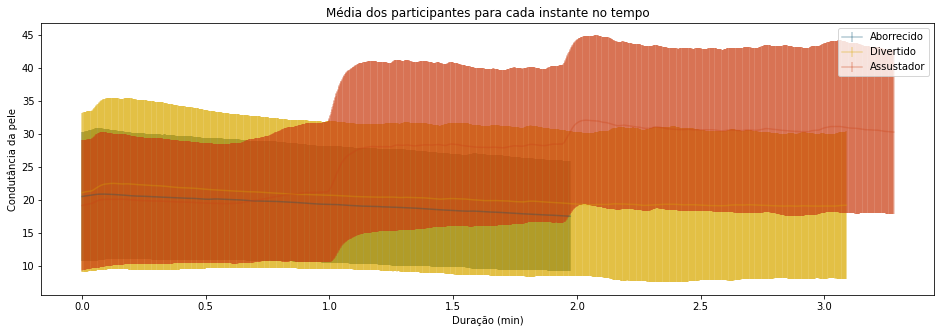

In [13]:
#@title

fig = plt.figure(figsize=(16, 5))

for ki, video_id in enumerate(id_videos):
  df_video = df.copy()
  df_video = df_video[df_video["video"]==video_id]

  for i in id_subjects:
    df_video.loc[df["subject"] == i, "daqtime"] = list(range(len(df_video[df_video["subject"] == i]["daqtime"])))

  df_clean = df_video.pivot_table("gsr", ["daqtime"], "subject").dropna()

  mean_time = df_clean.mean(axis=1)
  std_time = df_clean.std(axis=1)
  time_axis = np.asarray(range(len(mean_time)))*0.1/60
  
  _ = plt.errorbar(time_axis, mean_time, yerr=std_time, label=video_id,
                   alpha=0.3, color=colors[ki])
_ = plt.legend()
_ = plt.xlabel("Duração (min)")
_ = plt.title("Média dos participantes para cada instante no tempo")
_ = plt.ylabel("Condutância da pele")

#### STOP - Paragem para pensar!!
Responde às sequintes questões:
- O que nos diz o gráfico acima? Que conclusões podemos tirar?

### Aglomeração por tempo

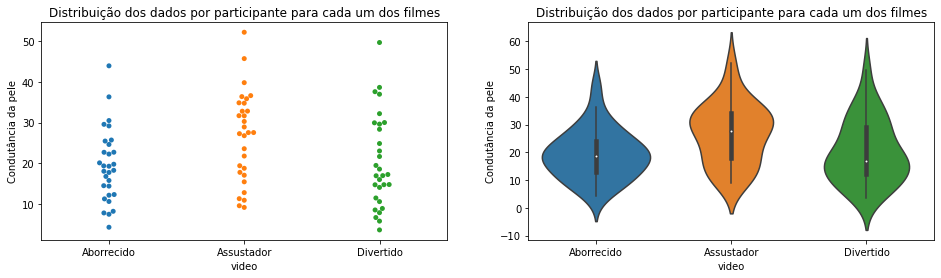

In [14]:
#@title

fig, axs = plt.subplots(1, 2, figsize=(16, 4))

mean_per_movie_and_subject = df.groupby(by=["video", "subject"]).mean().reset_index()

sns.swarmplot(x="video", y="gsr", data=mean_per_movie_and_subject, ax=axs[0])
_ = axs[0].set_title("Distribuição dos dados por participante para cada um dos filmes")
_ = axs[0].set_ylabel("Condutância da pele")
sns.violinplot(x="video", y="gsr", data=mean_per_movie_and_subject, ax=axs[1])
_ = axs[1].set_title("Distribuição dos dados por participante para cada um dos filmes")
_ = axs[1].set_ylabel("Condutância da pele")



#### STOP - Paragem para pensar!!
Responde às sequintes questões:
- Os gráficos acima dizem a mesma coisa?
- Acham que conseguem tirar alguma conclusão?

### Teste Estatístico 

Um teste estatítico permite-nos averiguar se podemos rejeitar a hipósese nula ($H_0$). (relembrar: a hipótese nula diz-nos que não há diferenças no nível de suor produzido durante a visualização dos diferentes filmes!) 

Existem diferentes testes estatísticos, cada um com diferentes requisitos e vantagens. Por exemplo, existem testes para dados quantitativos e teste para dados qualitativos. 

> **Qual é o vosso caso?**

Para o vosso problema iremos utilizar um teste designado por: One-way ANOVA (ou, ANOVA univariada). Vocês estão a testar um factor: o tipo de filme, e  este factor têm vários níveis (divertido, aborrecido e assustador). 

Neste teste, as médias de cada um dos níveis vão ser comparadas. O teste irá retornar um valor, designado de **$p-value$**, quanto menor este valor maior a probabilidade de existir uma diferença real entre os filmes que se reflecte nos níveis de condutância da pele. No entanto, queremos saber se a diferença é significativa, para isso é comparado o valor do **$p-value$** com um limiar. Se o valor for inferior ao limiar dizemos que a diferença é significativa, caso contrário não é. 

Os limiares que se usam actualmente são 0.05, 0.01 ou 0.001, para cada um deles há uma probabilidade da nossa hipótese nula poder ser rejeitada (isto é, de podermos dizer, que há diferenças entre os filmes). Quando mais baixo for o limiar maior é a probabilidade. 




In [6]:
#@title
from scipy.stats import f_oneway
from IPython.display import display, Markdown

def is_significant(limiar, df_eval):

  levels = []
  categories = pd.unique(df_eval["video"])
  for cat in categories:
    values = df_eval[df_eval["video"] == cat]["gsr"]
    levels.append(values)

  result_stat = f_oneway(levels[0], levels[1], levels[2])

  display(Markdown(f'### p-value: {result_stat.pvalue}'))
  if result_stat.pvalue < limiar:
    display(Markdown(f'### Existem diferenças no sinal para differentes tipos de filmes {limiar} > {result_stat.pvalue}'))
    print()
    print(pairwise_tukeyhsd(df_eval["gsr"].values, df_eval["video"].values, alpha=limiar))

  else:
    display(Markdown(f'### Não existem diferenças no sinal para differentes tipos de filmes {limiar} <= {result_stat.pvalue}'))

from statsmodels.stats.multicomp import pairwise_tukeyhsd

interact(is_significant, limiar=[0.05, 0.01, 0.001], df_eval=fixed(mean_per_movie_and_subject));



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


interactive(children=(Dropdown(description='limiar', options=(0.05, 0.01, 0.001), value=0.05), Output()), _dom…

### Métricas do sinal

Segundo o que vimos até aqui, a resposta de condutância da pele dos participantes é parecida quando usamos o mesmo estímulo (tipo de filme): há um aumento da condutância da pele para o filme assustador. Mas nos gráficos acima, apesar de assim parecer, isto não é totalmente evidente. 

Isto é porque cada um de nós tem um nível basal diferente (por exemplo, há pessoas que têm sempre as mãos molhadas, e outras têm que usar mais creme porque têm sempre as mãos secas!). Por isso, para conseguir ter em conta essas diferenças e se poder comparar os dados, às vezes temos de extrair outras medidas do sinal - para além da média - para que seja mais evidente o efeito do estímulo (tipo de filme) e menos evidente a variabilidade (na quantidade de suor produzido pela pele) de cada um. 


> **Que métrica acham que seria importante extrair neste caso?**



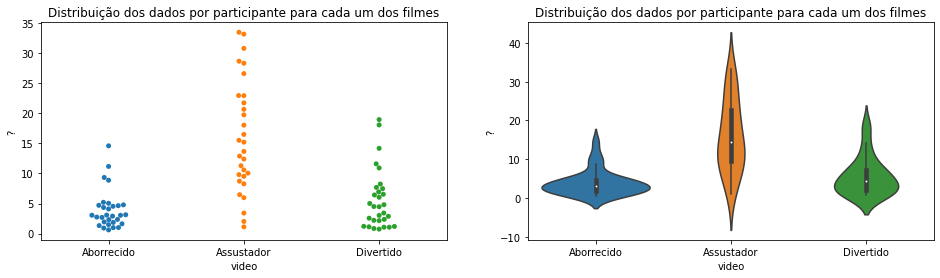

In [7]:
#@title

fig, axs = plt.subplots(1, 2, figsize=(16, 4))


min_per_movie_and_subject = df.groupby(by=["video", "subject"]).min().reset_index()
max_per_movie_and_subject = df.groupby(by=["video", "subject"]).max().reset_index()

dif_per_movie_and_subject = max_per_movie_and_subject.copy()
dif_per_movie_and_subject["gsr"] = max_per_movie_and_subject[["gsr"]] - min_per_movie_and_subject[["gsr"]]

sns.swarmplot(x="video", y="gsr", data=dif_per_movie_and_subject, ax=axs[0])
_ = axs[0].set_title("Distribuição dos dados por participante para cada um dos filmes")
_ = axs[0].set_ylabel("?")
sns.violinplot(x="video", y="gsr", data=dif_per_movie_and_subject, ax=axs[1])
_ = axs[1].set_title("Distribuição dos dados por participante para cada um dos filmes")
_ = axs[1].set_ylabel("?")


#### STOP - Paragem para pensar!!
- O que acham desta métrica em comparação com a anterior (a média)?
- O que interpretam daqui?




### Teste estatístico

In [8]:
#@title
from scipy.stats import f_oneway
from IPython.display import display, Markdown

interact(is_significant, limiar=[0.05, 0.01, 0.001], df_eval=fixed(dif_per_movie_and_subject));


interactive(children=(Dropdown(description='limiar', options=(0.05, 0.01, 0.001), value=0.05), Output()), _dom…

## Anexos

### Análise exploratória por género e grupo de idades

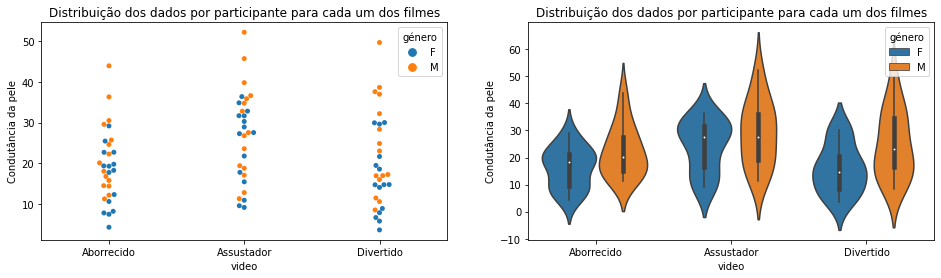

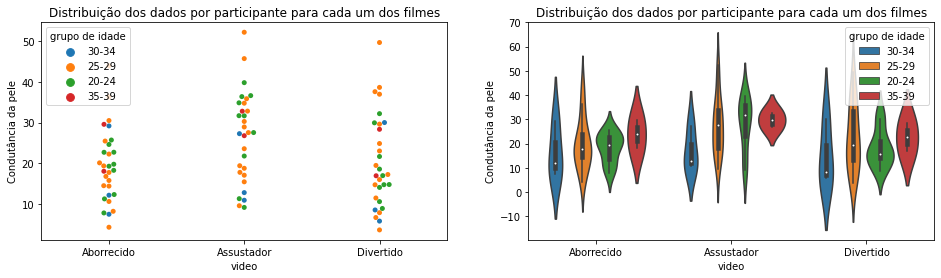

In [15]:
#@title
add_features = [("género", "Sex"), ("grupo de idade", "Age-Group")]

for feat in add_features:
  mean_per_movie_and_subject[feat[0]] = mean_per_movie_and_subject["subject"].apply(lambda x: df_subjects[df_subjects["Participant-ID"]==x][feat[1]].iloc[0])

  fig, axs = plt.subplots(1, 2, figsize=(16, 4))

  sns.swarmplot(x="video", y="gsr", data=mean_per_movie_and_subject, hue=feat[0], ax=axs[0])
  _ = axs[0].set_title("Distribuição dos dados por participante para cada um dos filmes")
  _ = axs[0].set_ylabel("Condutância da pele")
  sns.violinplot(x="video", y="gsr", data=mean_per_movie_and_subject, hue=feat[0], ax=axs[1])
  _ = axs[1].set_title("Distribuição dos dados por participante para cada um dos filmes")
  _ = axs[1].set_ylabel("Condutância da pele")